In [35]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt     
import seaborn as sns   
# sns. set(style="whitegrid")

In [22]:
df = pd.read_csv("Zomato_data.csv")
df.head()


,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [23]:
df.shape
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


,votes,approx_cost(for two people)
count,148.000000,148.000000
mean,264.810811,418.243243
std,653.676951,223.085098
min,0.000000,100.000000
25%,6.750000,200.000000
50%,43.500000,400.000000
75%,221.750000,600.000000
max,4884.000000,950.000000


In [24]:
def handle_rate(value):
    if value == "NEW" or value == "-":
        return np.nan
    value = str(value).split('/')[0]
    return float(value)


In [25]:
df['rate'] = df['rate'].apply(handle_rate)
df['rate'].head()

0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: float64

In [26]:
df.isnull().sum()


name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64

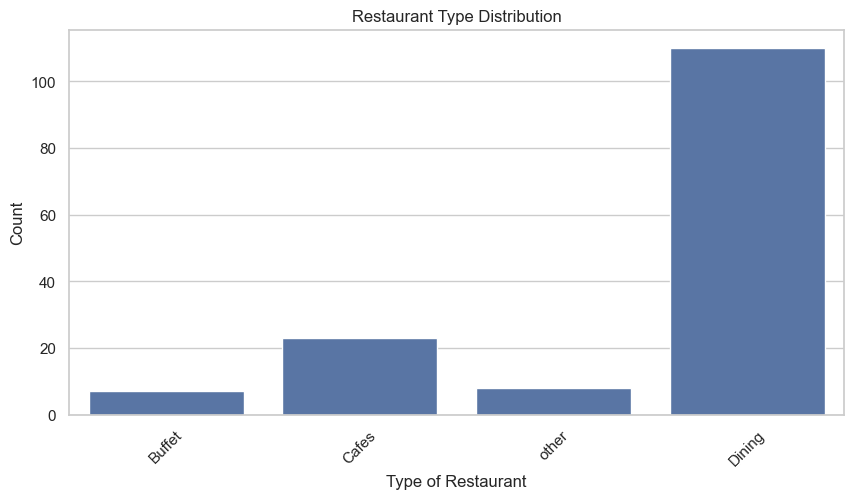

In [27]:
# Restaurant Details
plt.figure(figsize=(10,5))
sns.countplot(x='listed_in(type)', data=df)
plt.xticks(rotation=45)
plt.xlabel("Type of Restaurant")
plt.ylabel("Count")
plt.title("Restaurant Type Distribution")
plt.show()

In [28]:
grouped_data = df.groupby('listed_in(type)')['votes'].sum().sort_values(ascending=False)


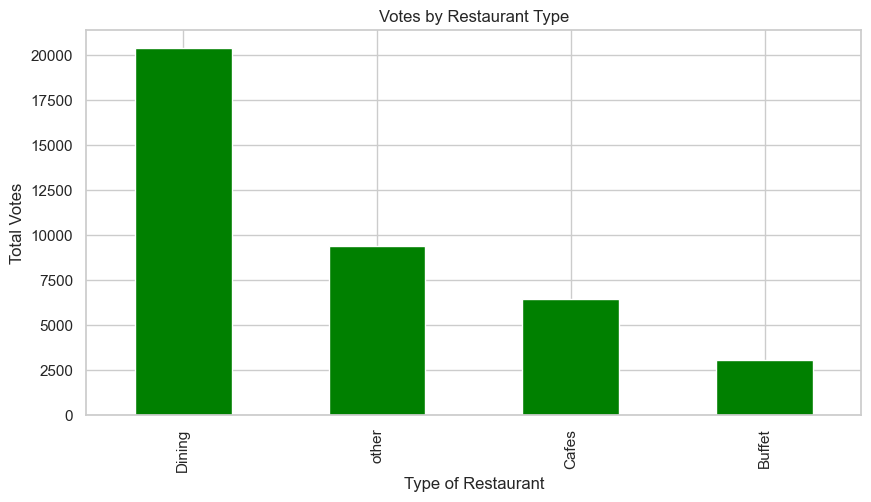

In [29]:
plt.figure(figsize=(10,5))
grouped_data.plot(kind='bar', color='green')
plt.xlabel("Type of Restaurant")
plt.ylabel("Total Votes")
plt.title("Votes by Restaurant Type")
plt.show()


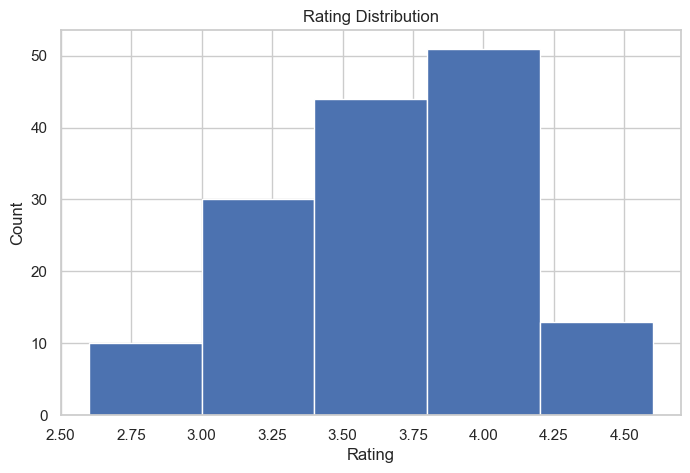

In [30]:
# Rating Distribution
plt.figure(figsize=(8,5))
plt.hist(df['rate'], bins=5)
plt.xlabel("Rating")
plt.ylabel("Count")
plt.title("Rating Distribution")
plt.show()

In [31]:
df['approx_cost(for two people)'] = (
    df['approx_cost(for two people)']
    .astype(str)
    .str.replace(',', '', regex=False)
)
df['approx_cost(for two people)'] = pd.to_numeric(
    df['approx_cost(for two people)'],
    errors='coerce'
)



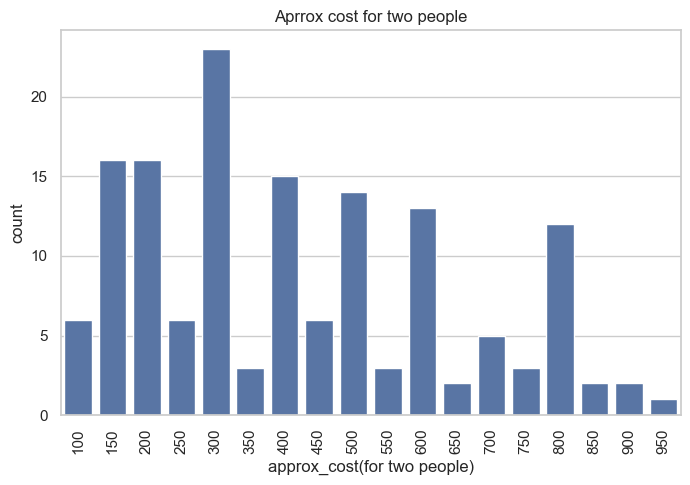

In [32]:
# Visualization
plt.figure(figsize=(8,5))
sns.countplot(x='approx_cost(for two people)', data=df)
plt.xticks(rotation=90)
plt.title("Aprrox cost for two people")
plt.show()

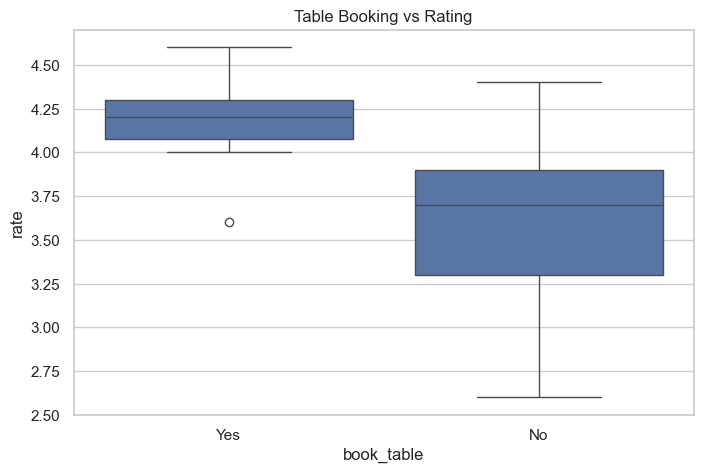

In [33]:
# Table booking and rating
plt.figure(figsize=(8,5))
sns.boxplot(x='book_table',y='rate', data=df)  
plt.title("Table Booking vs Rating")
plt.show()

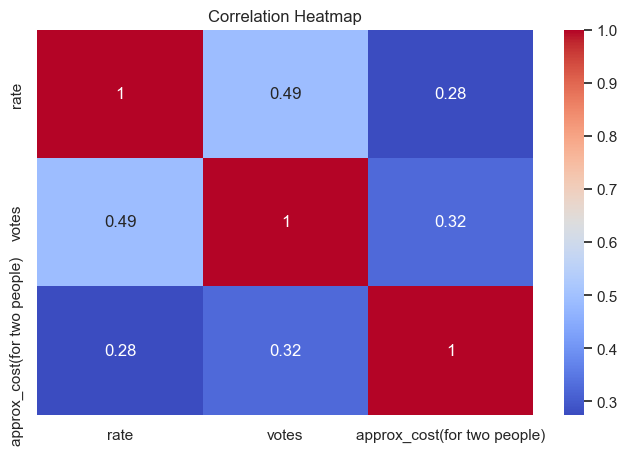

In [34]:
# correlation Heatmap
numeric_df = df.select_dtypes(include=np.number)
plt.figure(figsize=(8,5))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()